
## Supervised classification - improving capacity learning
<hr>

## 0. Import library
<hr>

In [29]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

import math


## 1. Load and plot the dataset (dataset-b.txt)
<hr>
The data features for each data $i$ are $x_i=(x_{i(1)},x_{i(2)})$.

The data label/target, $y_i$, indicates two classes with value 0 or 1.

Plot the data points.

You may use matplotlib function `scatter(x,y)`.

Number of the data = 1000
Shape of the data = (1000, 3)
Data type of the data = float64


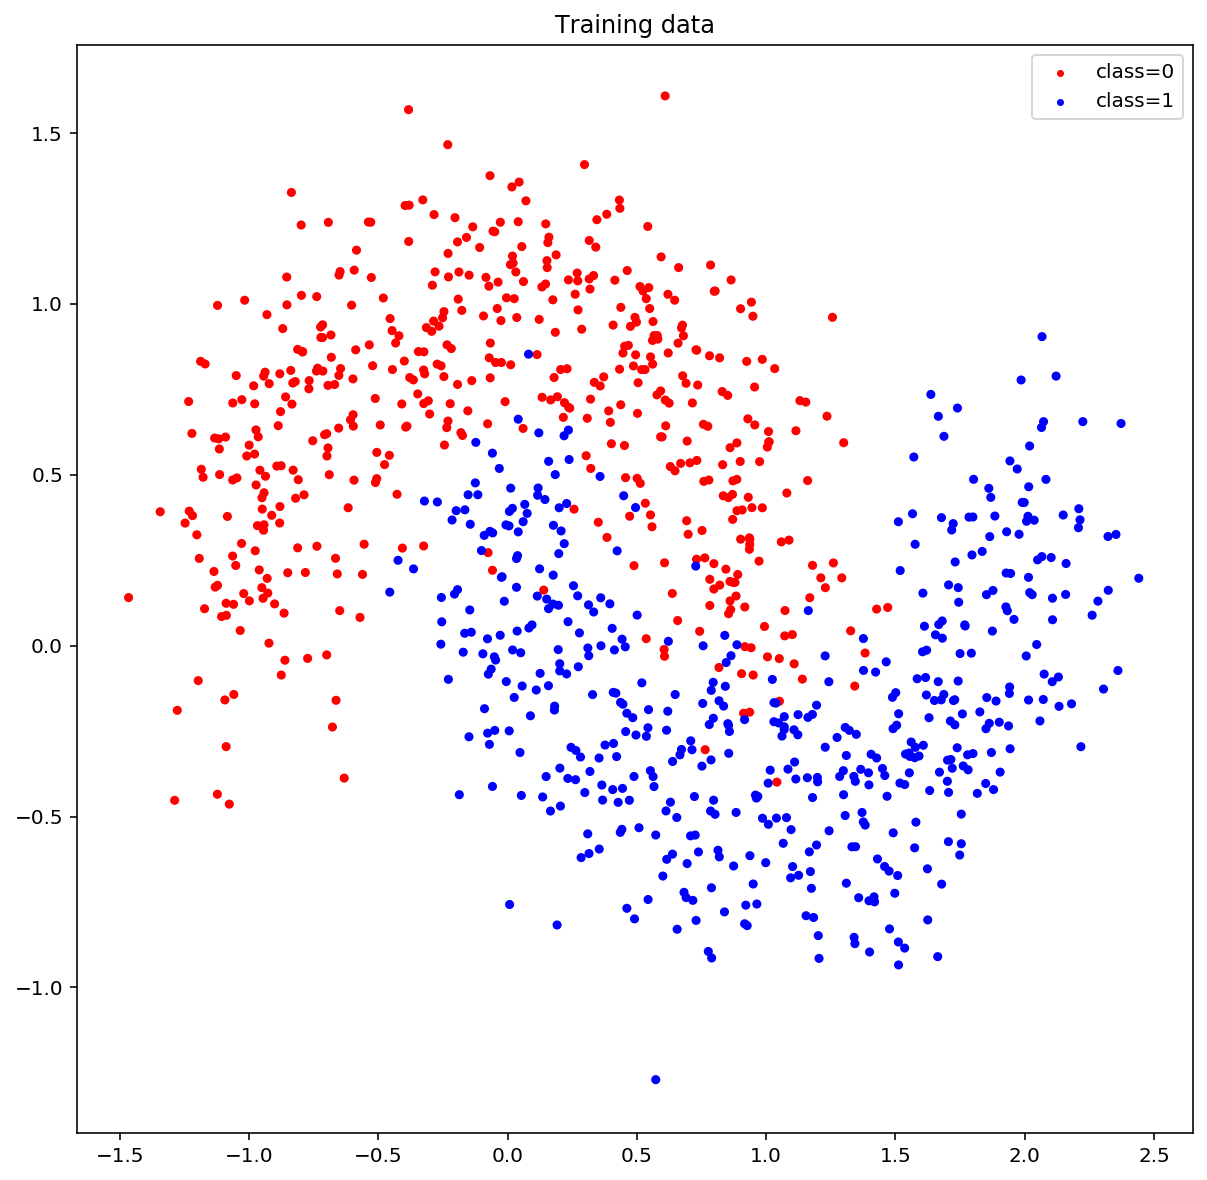

In [30]:
# import data with numpy
data = np.loadtxt('dataset-b.txt', delimiter=',')

# number of training data
n = data.shape[0] 
print('Number of the data = {}'.format(n))
print('Shape of the data = {}'.format(data.shape))
print('Data type of the data = {}'.format(data.dtype))

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx = data[:,2] # label

idx_class0 = (idx==0) # index of class0
idx_class1 = (idx==1) # index of class1

plt.figure(1,figsize=(10,10))
plt.scatter(x1, x2, s=idx_class0*50, c='r', marker='.', label='class=0') 
plt.scatter(x1, x2, s=idx_class1*50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

## 2. Define a logistic regression loss function and its gradient
<hr>

In [31]:
# sigmoid function
def sigmoid(z):
    sigmoid_f = 1 / (1 + np.exp(-z))
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(X@w)
    return p


# loss function definition
def loss_logreg(y_pred,y): 
    n = len(y)
    loss = (-y.T @ np.log(y_pred) - (1-y).T @ np.log(1-y_pred)) / n
    return loss


# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(y)
    grad = X.T @ (y_pred - y) * 2 / n
    return grad


# gradient descent function definition
def grad_desc(X, y, w_init, tau, max_iter):

    L_iters = np.zeros([max_iter]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred = f_pred(X,w) # linear predicition function   
        grad_f = grad_loss(y_pred,y,X) # gradient of the loss  
        w = w - tau * grad_f # update rule of gradient descent  
        L_iters[i] = loss_logreg(y_pred,y) # save the current loss value 
        
    return w, L_iters

## 3. define a prediction function and run a gradient descent algorithm
<hr>

The logistic regression/classification predictive function is defined as:

$$
\begin{aligned}
p_w(x) &= \sigma(X w)
\end{aligned}
$$

The prediction function can be defined in terms of the following feature functions $f_i$ as follows:

$$
X = 
\left[ 
\begin{array}{cccccc}
f_0(x_1) & f_1(x_1) & f_2(x_1) & f_3(x_1) & f_4(x_1) & f_5(x_1) & f_6(x_1) & f_7(x_1) & f_8(x_1) & f_9(x_1) \\
f_0(x_2) & f_1(x_2) & f_2(x_2) & f_3(x_2) & f_4(x_2) & f_5(x_2) & f_6(x_2) & f_7(x_2) & f_8(x_2) & f_9(x_2) \\
\vdots\\
f_0(x_n) & f_1(x_n) & f_2(x_n) & f_3(x_n) & f_4(x_n) & f_5(x_n) & f_6(x_n) & f_7(x_n) & f_8(x_n) & f_9(x_n) \\
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2 \\ 
w_3 \\ 
w_4 \\ 
w_5 \\
w_6 \\ 
w_7 \\ 
w_8 \\ 
w_9
\end{array} 
\right]
\quad
$$

where $x_i = (x_i(1), x_i(2))$ and you can define a feature function $f_i$ as you want.

You can use at most 10 feature functions $f_i$, $i = 0, 1, 2, \cdots, 9$ in such a way that the classification accuracy is maximized. You are allowed to use less than 10 feature functions.

Implement the logistic regression function with gradient descent using a vectorization scheme.

(1000, 10)
Time= 6.6821393966674805
(10, 1)


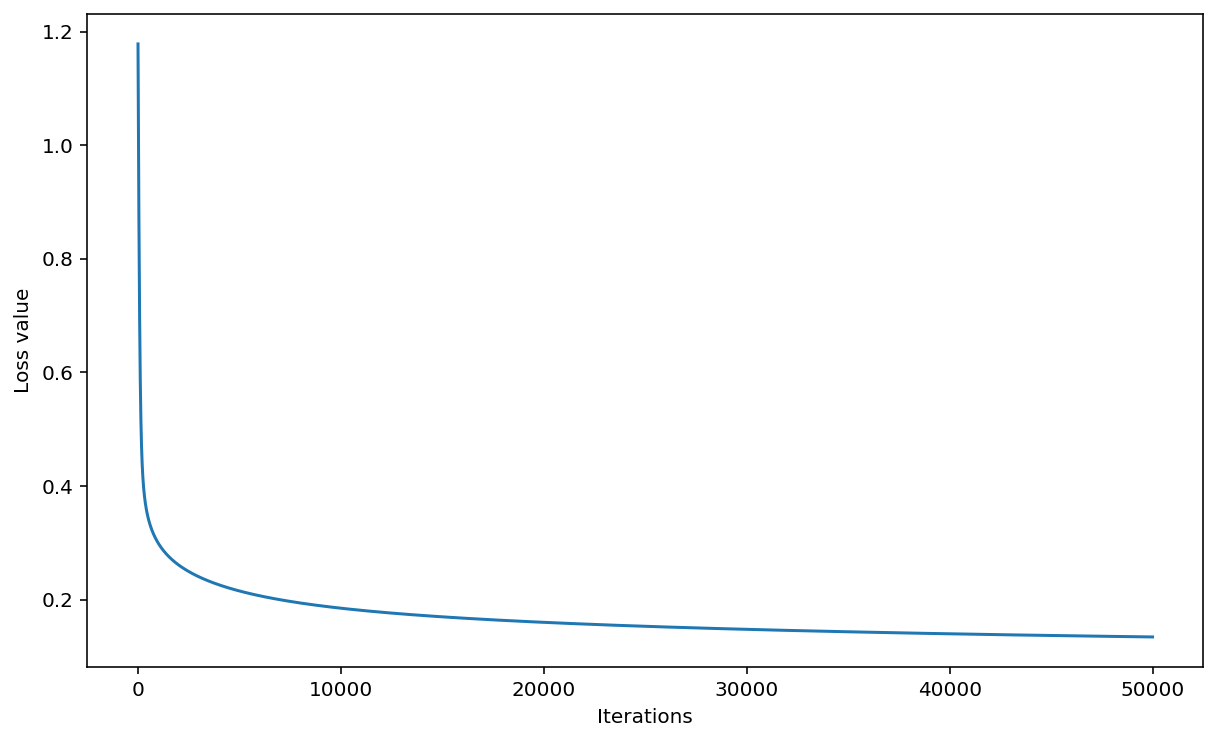

In [40]:
# construct the data matrix X, and label vector y
n = data.shape[0]
X = np.ones([n,10])

X[:,1] = x1
X[:,2] = x2
X[:,3] = x1**2
X[:,4] = x2**2
X[:,5] = x1**3
X[:,6] = x2**3
X[:,7] = np.sin(x1)
X[:,8] = np.sin(x2)
X[:,9] = np.sinh(x1)

y = data[:,2][:,None] # label 
print(X.shape)


# run gradient descent algorithm
start = time.time()
w_init = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])[:,None]
tau = 1e-2; max_iter = 50000
w, L_iters = grad_desc(X,y,w_init,tau,max_iter)
print('Time=',time.time() - start)
print(w.shape)


# plot
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 4. Plot the decision boundary
<hr>

(2500, 10)


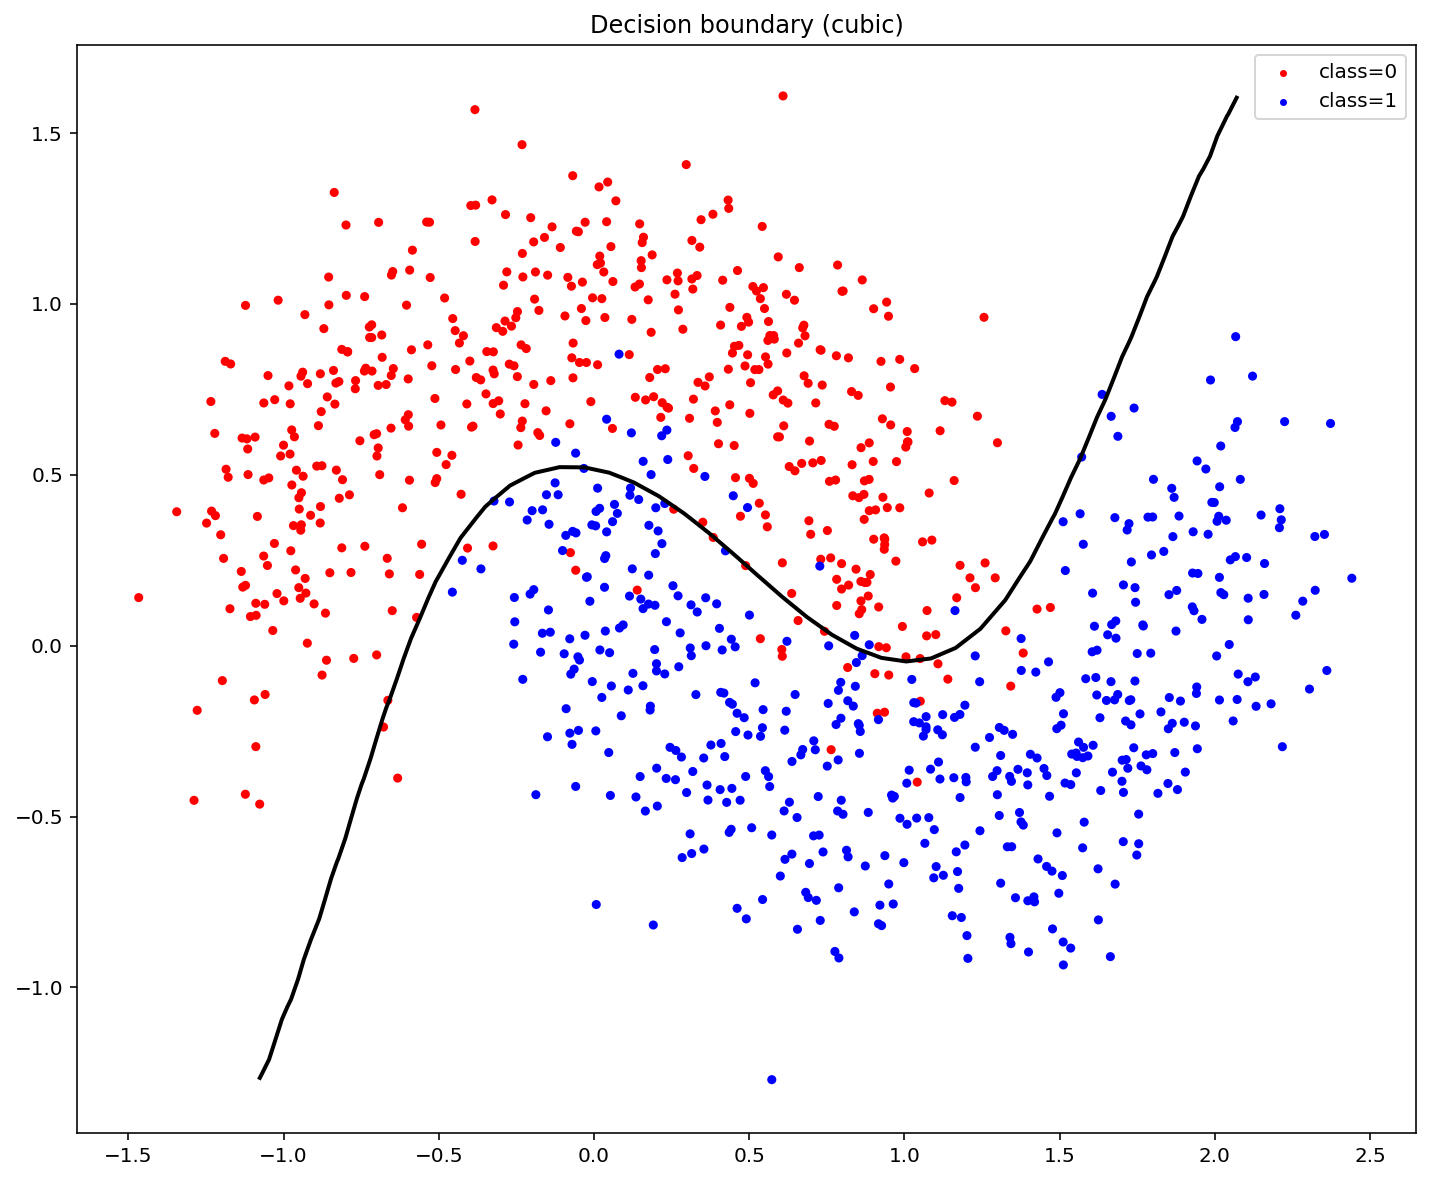

In [41]:
# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),10]) 

print(X2.shape)

X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
X2[:,3] = xx1.reshape(-1)**2
X2[:,4] = xx2.reshape(-1)**2
X2[:,5] = xx1.reshape(-1)**3
X2[:,6] = xx2.reshape(-1)**3
X2[:,7] = np.sin(xx1.reshape(-1))
X2[:,8] = np.sin(xx2.reshape(-1))
X2[:,9] = np.sinh(xx1.reshape(-1))

p = f_pred(X2,w)
p = p.reshape((len(xx1), len(xx2)))

# plot
plt.figure(4,figsize=(12,10))

#ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
#cbar = plt.colorbar(ax)
#cbar.update_ticks()

plt.scatter(x1, x2, s=idx_class0*50, c='r', marker='.', label='class=0') 
plt.scatter(x1, x2, s=idx_class1*50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p, 1, linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (cubic)')
plt.show()

## 5. Plot the probability map
<hr>

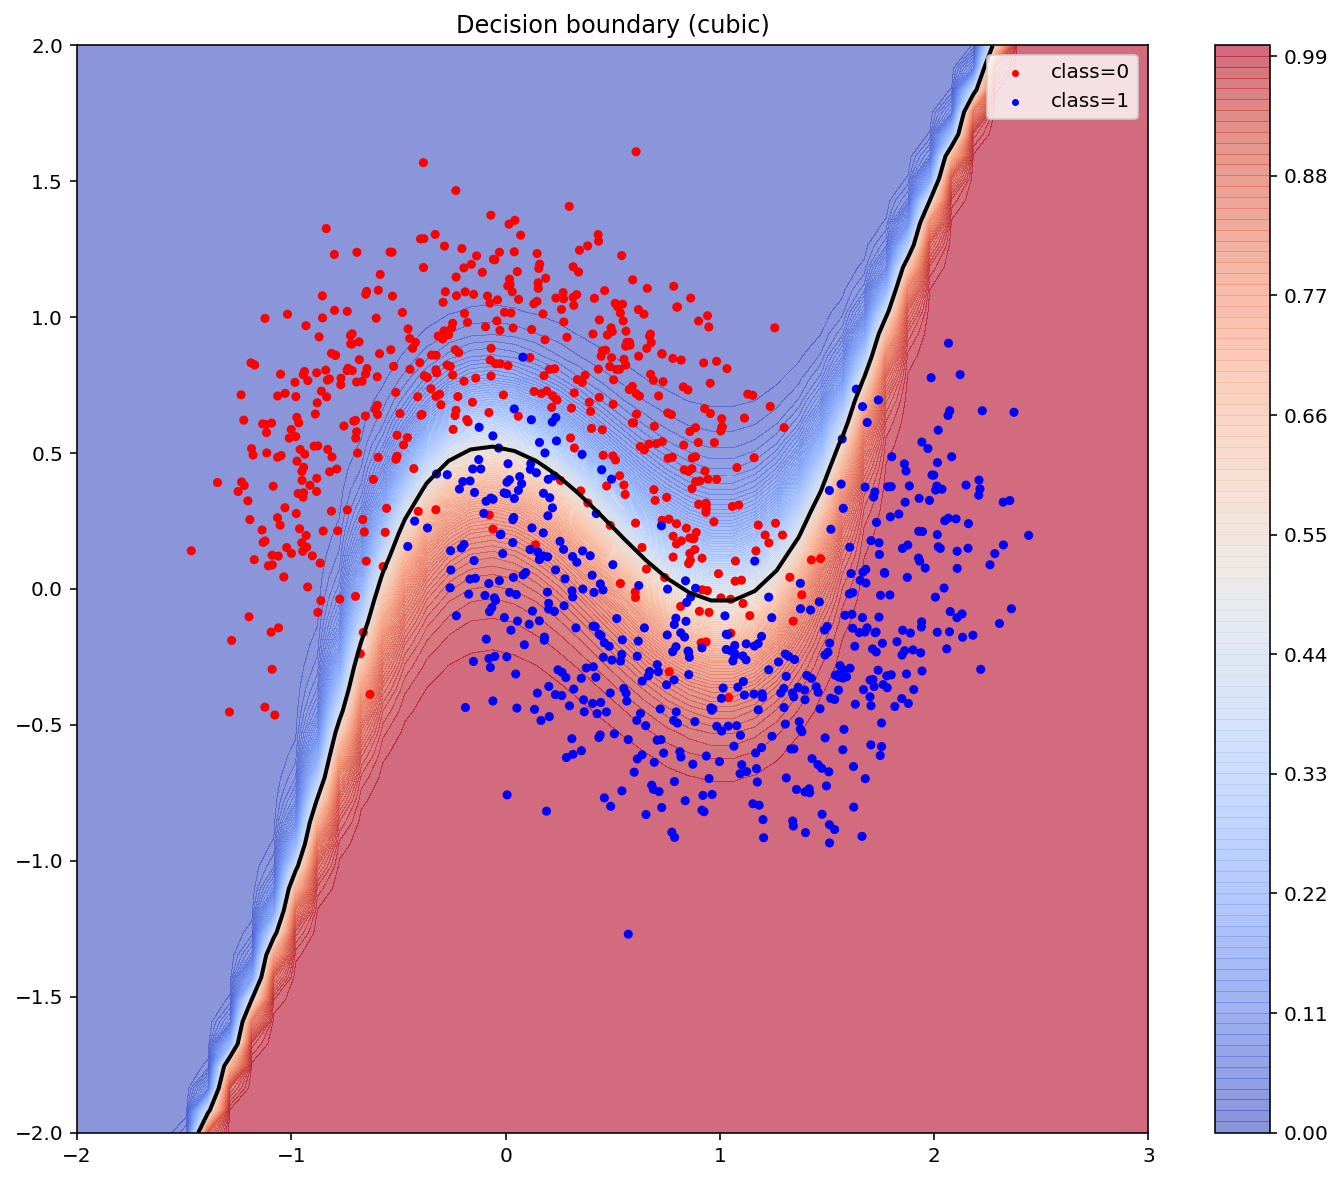

In [42]:
# compute values p(x) for multiple data points x
x1_min, x1_max = -2, 3 # min and max of grade 1
x2_min, x2_max = -2, 2 # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid

X2 = np.ones([np.prod(xx1.shape),10]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
X2[:,3] = xx1.reshape(-1)**2
X2[:,4] = xx2.reshape(-1)**2
X2[:,5] = xx1.reshape(-1)**3
X2[:,6] = xx2.reshape(-1)**3
X2[:,7] = np.sin(xx1.reshape(-1))
X2[:,8] = np.sin(xx2.reshape(-1))
X2[:,9] = np.sinh(xx1.reshape(-1))

p = f_pred(X2,w)
p = p.reshape((len(xx1), len(xx2)))

# plot
plt.figure(4,figsize=(12,10))

ax = plt.contourf(xx1, xx2, p, 100, vmin=0, vmax=1, cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

plt.scatter(x1, x2, s=idx_class0*50, c='r', marker='.', label='class=0') 
plt.scatter(x1, x2, s=idx_class1*50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p, 1, linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (cubic)')
plt.show()

## 6. Compute the classification accuracy
<hr>

### The accuracy is computed by:

$$
\textrm{accuracy} = \frac{\textrm{number of correctly classified data}}{\textrm{total number of data}}
$$

In [43]:
# compute the accuracy of the classifier
n = data.shape[0]

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx_class0 = (data[:,2]==0) # index of class0
idx_class1 = (data[:,2]==1) # index of class1

X3 = np.ones([n,10])

X3[:,1] = x1
X3[:,2] = x2
X3[:,3] = x1**2
X3[:,4] = x2**2
X3[:,5] = x1**3
X3[:,6] = x2**3
X3[:,7] = np.sin(x1)
X3[:,8] = np.sin(x2)
X3[:,9] = np.sinh(x1)

p = f_pred(X3,w)

idx_class1_pred = p.reshape(-1)*idx_class1
idx_class0_pred = p.reshape(-1)*idx_class0

#print(idx_class1_label)
#print(idx_class1_pred)

print(np.count_nonzero(idx_class1_pred >= 0.5))

correct_data = np.count_nonzero(idx_class1_pred >= 0.5) + (np.sum(idx_class0) - np.count_nonzero(idx_class0_pred >= 0.5))

print('total number of data =', n)
print('total number of correctly classified data = ', correct_data)
print('accuracy(%) = ', correct_data / n * 100)

NameError: name 'idx_class1_label' is not defined

## Output using the dataset (dataset-b.txt)
<hr>

## 1. Visualize the data [1pt]
<ht>

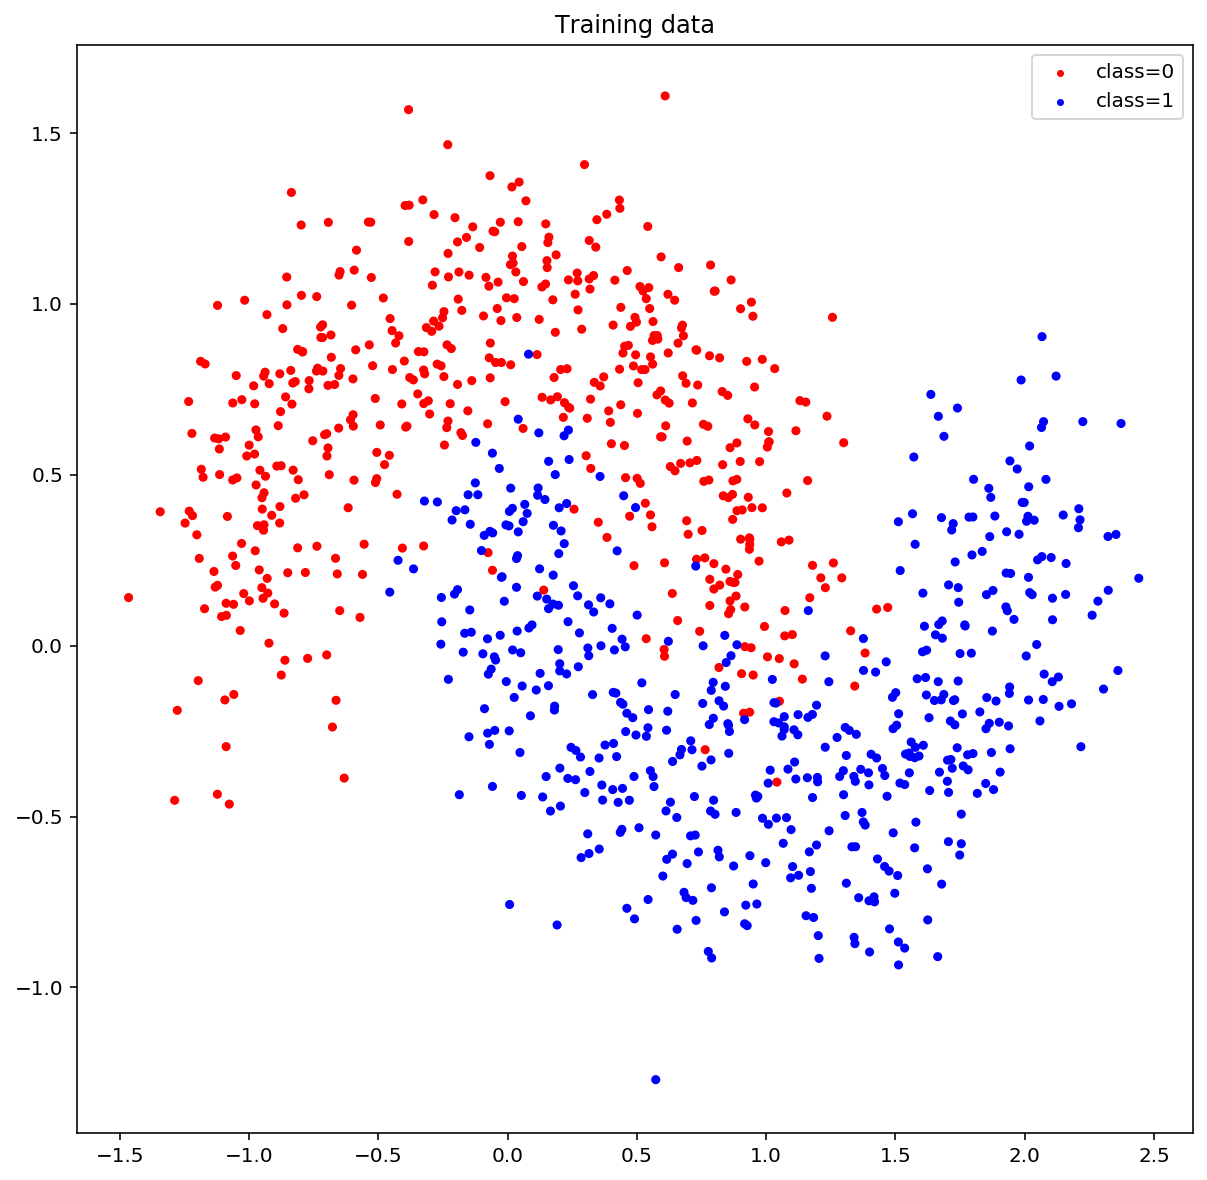

In [3]:
plt.figure(1,figsize=(10,10))
plt.scatter(x1, x2, s=idx_class0*50, c='r', marker='.', label='class=0') 
plt.scatter(x1, x2, s=idx_class1*50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

## 2. Plot the loss curve obtained by the gradient descent until the convergence [2pt]
<hr>

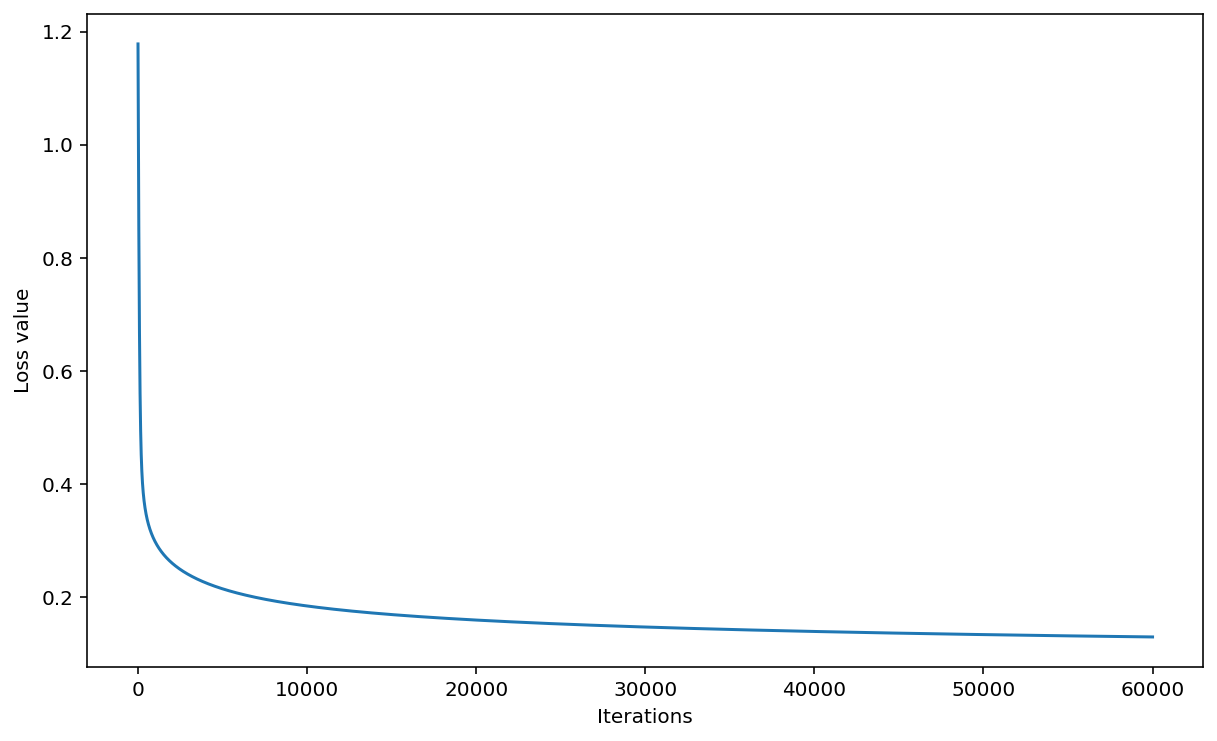

In [73]:
# plot
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 3. Plot the decisoin boundary of the obtained classifier [2pt]
<hr>

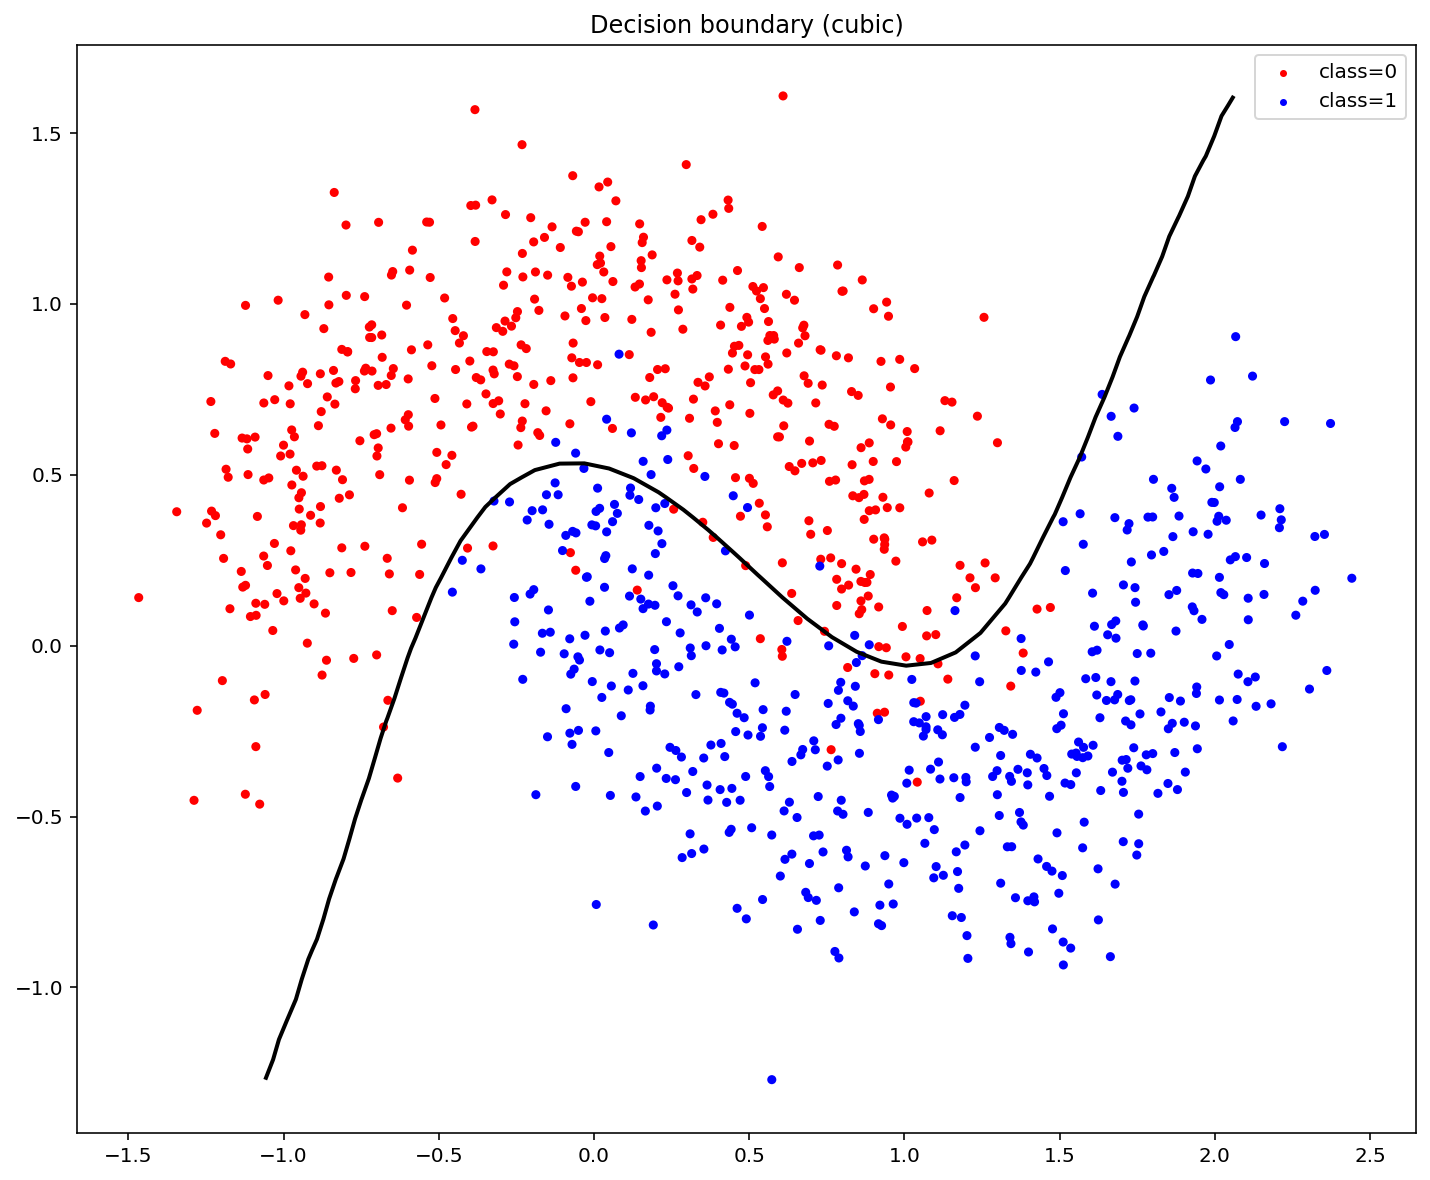

In [77]:
# plot
plt.figure(4,figsize=(12,10))

#ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
#cbar = plt.colorbar(ax)
#cbar.update_ticks()

plt.scatter(x1, x2, s=idx_class0*50, c='r', marker='.', label='class=0') 
plt.scatter(x1, x2, s=idx_class1*50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p, 1, linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (cubic)')
plt.show()

## 4. Plot the probability map of the obtained classifier [2pt]
<hr>

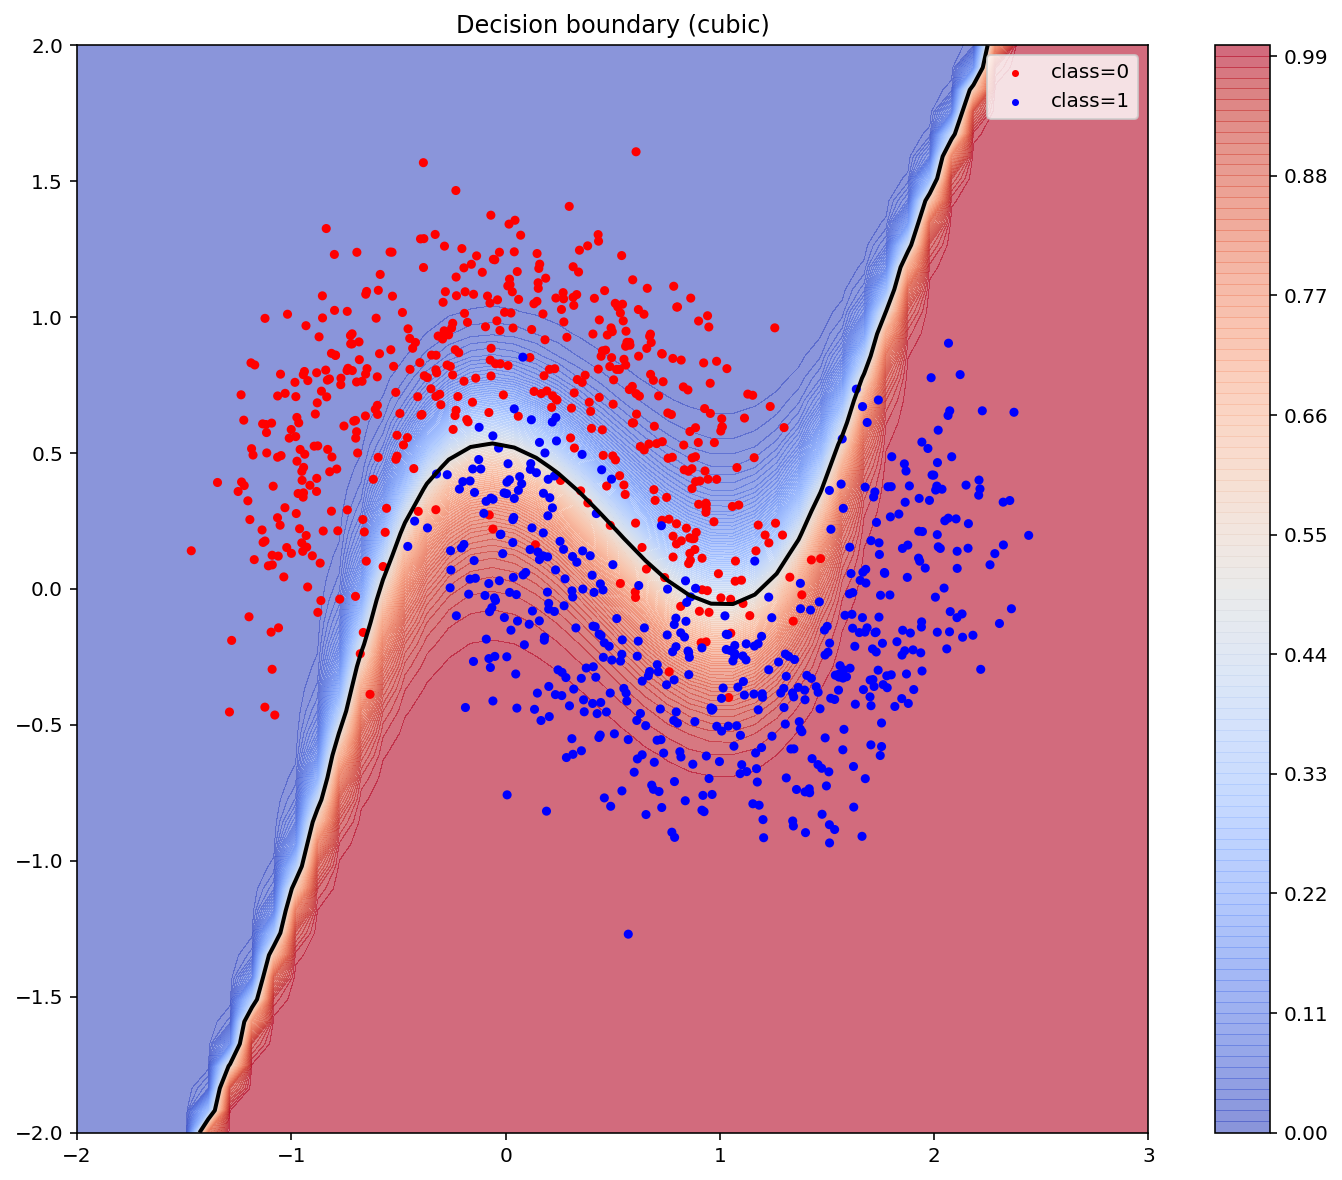

In [79]:
# plot
plt.figure(4,figsize=(12,10))

ax = plt.contourf(xx1, xx2, p, 100, vmin=0, vmax=1, cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

plt.scatter(x1, x2, s=idx_class0*50, c='r', marker='.', label='class=0') 
plt.scatter(x1, x2, s=idx_class1*50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p, 1, linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (cubic)')
plt.show()

## 5. Compute the classification accuracy [1pt]
<hr>

In [81]:
print('total number of data =', n)
print('total number of correctly classified data = ', correct_data)
print('accuracy(%) = ', correct_data / n * 100)

total number of data = 1000
total number of correctly classified data =  954
accuracy(%) =  95.39999999999999
